<a href="https://colab.research.google.com/github/narwhalhorned/spotify-popularity/blob/main/Spotify_Song_Popularity_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spotify Song Popularity Prediction

# Predictive Analysis of Song Popularity on Spotify

## **Introduction**

Welcome to this notebook showcasing a sophisticated predictive analysis of song popularity on the Spotify platform. In this project, we venture into the dynamic intersection of data science and the music industry, where insights into song success can be a game-changer for artists, labels, and streaming services.



### **Problem Definition**

The project is poised to address a critical challenge: crafting a robust predictive model that accurately anticipates the popularity of songs. By accomplishing this, it aims to empower music industry stakeholders with actionable intelligence for optimizing marketing strategies, fine-tuning playlists, and catalyzing artist visibility.



### **Dataset**

I have obtained a comprehensive dataset from Spotify (Scraped directly from Spotify Web  API & from https://www.kaggle.com/datasets/yasserh/song-popularity-dataset), containing information about a diverse range of songs. This dataset includes features such as artist name, genre, danceability, tempo, and more. By harnessing the power of machine learning, we will uncover patterns and relationships within this data to build a model that predicts song popularity. **I've made sure to use an old spotify dataset from kaggle as per Spotify Web Dev Policy**



### **Project Roadmap**

This project will be structured into three main key phases:

1. Understanding Data
2. Exploratory Data Analysis (EDA)
3. Model Building & Prediction

Let's embark on this data-driven journey to unlock the secrets behind song popularity and revolutionize how the music industry approaches success!


## Load & Understanding Data

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
import pickle

In [15]:
df = pd.read_csv("song_data.csv")
df.tail(5)

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
18830,Let It Breathe,60,159645,0.893,0.500,0.151,0.000065,11,0.111,-16.107,1,0.0348,113.969,4,0.300
18831,Answers,60,205666,0.765,0.495,0.161,0.000001,11,0.105,-14.078,0,0.0301,94.286,4,0.265
18832,Sudden Love (Acoustic),23,182211,0.847,0.719,0.325,0.000000,0,0.125,-12.222,1,0.0355,130.534,4,0.286
18833,Gentle on My Mind,55,352280,0.945,0.488,0.326,0.015700,3,0.119,-12.020,1,0.0328,106.063,4,0.323
18834,Up to Me,60,193533,0.911,0.640,0.381,0.000254,4,0.104,-11.790,1,0.0302,91.490,4,0.581


### Table below explains all the variables from the dataset.

| Variable          | Explanation                                                                       |
|-----------------------|-----------------------------------------------------------------------------------|
| song_name             | The name of the song.                                                             |
| song_popularity       | The popularity score of the song.                                                |
| song_duration_ms      | The duration of the song in milliseconds.                                        |
| acousticness          | A confidence measure of whether the track is acoustic (0.0 represents high confidence). |
| danceability          | A measure of how suitable the song is for dancing. Higher values indicate better danceability. |
| energy                | A measure of intensity and activity in the song. Higher values indicate a more energetic track. |
| instrumentalness      | A measure of how much of the song contains no vocals (instrumental). |
| key                   | The pitch, notes, or scale of the song. Ranges from 0 to 11. |
| liveness              | A measure that detects the presence of an audience in the recording, indicating live performances. |
| loudness              | The overall loudness of the song, ranging from -60 to 0 dB. Higher values indicate a louder song. |
| audio_mode            | Represents whether the song is major (1.0) or minor (0.0) key. |
| speechiness           | Detects the presence of spoken words in a track. Values above 0.66 indicate speech-like recordings. |
| tempo                 | The tempo of the song in beats per minute (BPM). |
| time_signature        | The time signature of the song, indicating its rhythmic structure. |
| audio_valence         | A measure describing the musical positiveness of the track. Higher values represent a more positive mood. |


In [16]:
#Checking the data types
df.dtypes

song_name            object
song_popularity       int64
song_duration_ms      int64
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
audio_mode            int64
speechiness         float64
tempo               float64
time_signature        int64
audio_valence       float64
dtype: object

In [17]:
df.drop(['song_name'], axis=1, inplace=True) #Not needed as we are focusing on the attributes of the song & popularity score
display(df.head())

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [18]:
df.info() #We can see that there's no null values here, but we can check it in the cells below
print('\nThe Dataset consists of {} variables & {} samples.'.format(df.shape[1], df.shape[0]))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_popularity   18835 non-null  int64  
 1   song_duration_ms  18835 non-null  int64  
 2   acousticness      18835 non-null  float64
 3   danceability      18835 non-null  float64
 4   energy            18835 non-null  float64
 5   instrumentalness  18835 non-null  float64
 6   key               18835 non-null  int64  
 7   liveness          18835 non-null  float64
 8   loudness          18835 non-null  float64
 9   audio_mode        18835 non-null  int64  
 10  speechiness       18835 non-null  float64
 11  tempo             18835 non-null  float64
 12  time_signature    18835 non-null  int64  
 13  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5)
memory usage: 2.0 MB

The Dataset consists of 14 variables & 18835 samples.


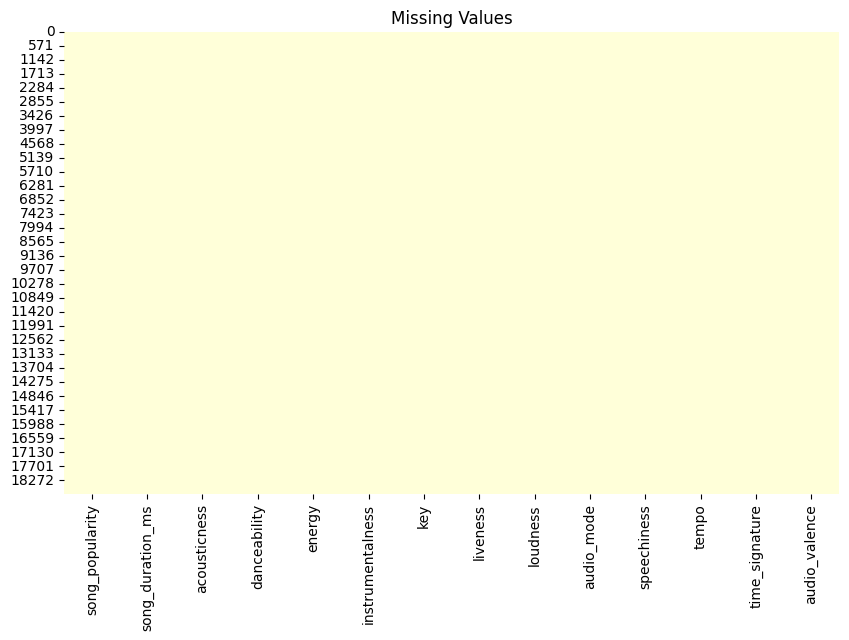

In [19]:
#Check for missing values
missing_values = df.isnull()

#Heatmap to visualize missing values (Nulls will be presented in reddish colour)
plt.figure(figsize=(10, 6))
sns.heatmap(missing_values, cbar=False, cmap='YlGnBu')
plt.title('Missing Values')
plt.show()

#Check if there are any missing values
if missing_values.any().any():
    print("There are missing values in the dataset.")
    print(df.isnull().sum()) #Count of null if it is present
else:
    print("No missing values found in the dataset.")

In [20]:
#Summary statistics of the DataFrame
display(df.describe())

No missing values found in the dataset.


,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


## Exploratory Data Analyis (EDA)

### Distribution Graph

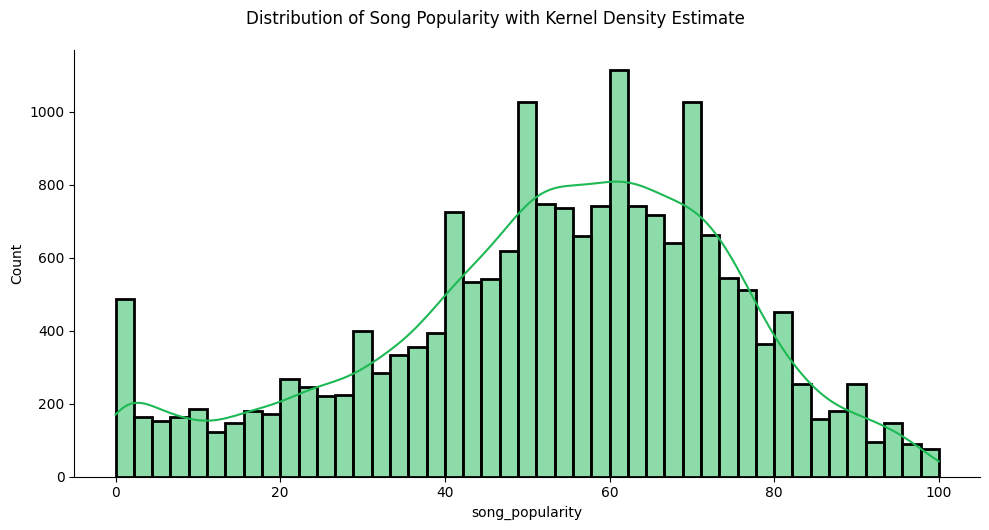

Info: Based on Freedman-Diaconis Rule, 45 bins were used for this data as the optimal number of bins for this variable.

Statistical Tests:

Anderson-Darling Test Results:
Statistic: 135.00478087756346
Critical Values: [0.576 0.656 0.787 0.918 1.092]
Significance Levels: [15.  10.   5.   2.5  1. ]
The data does not appear to be normally distributed at 1500.0% significance level.
The data does not appear to be normally distributed at 1000.0% significance level.
The data does not appear to be normally distributed at 500.0% significance level.
The data does not appear to be normally distributed at 250.0% significance level.
The data does not appear to be normally distributed at 100.0% significance level.

Skewness: -0.501447529268639

Interpretation:
1) The peak of the distribution is around 60 popularity score, indicating that many songs have a popularity score around that value.

2) The distribution of popularity scores exhibits a moderate spread, with individual scores ranging from 0 t

In [21]:
target = 'song_popularity'

#####Apply Freedman-Diaconis Rule to get optimal bins for distribution graph

#Calculate Interquartile Range
iqr = np.percentile(df[target], 75) - np.percentile(df[target], 25)

#Calculate bin width using the Freedman-Diaconis Rule
bin_width = 2 * iqr / np.cbrt(len(df[target]))

#Calculate the number of bins based on the bin width
num_bins = int((df[target].max() - df[target].min()) / bin_width)

spotify_color_palette = ["#1DB954"]
sns.set_palette(spotify_color_palette)

g = sns.displot(data=df, x=target, bins=num_bins, kde=True, linewidth=2, height=5, aspect=2)

g.fig.suptitle('Distribution of Song Popularity with Kernel Density Estimate', y=1.05)
plt.show()
print('Info: Based on Freedman-Diaconis Rule, ' + str(num_bins) + ' bins were used for this data as the optimal number of bins for this variable.')

#####Statistical tests to measure distribution and skewness

print('\nStatistical Tests:')

data = df['song_popularity']

#Anderson-Darling test to measure distribution
result = stats.anderson(data)

print("\nAnderson-Darling Test Results:")
print("Statistic:", result.statistic)
print("Critical Values:", result.critical_values)
print("Significance Levels:", result.significance_level)

#Compare the test statistic with critical values
for i in range(len(result.critical_values)):
    if result.statistic < result.critical_values[i]:
        print(f"The data appears to be normally distributed at {result.significance_level[i]*100}% significance level.")
    else:
        print(f"The data does not appear to be normally distributed at {result.significance_level[i]*100}% significance level.")

skewness = stats.skew(data)
print("\nSkewness:", skewness)

print('\nInterpretation:')

interpretations = [
    "1) The peak of the distribution is around 60 popularity score, indicating that many songs have a popularity score around that value.\n",
    "2) The distribution of popularity scores exhibits a moderate spread, with individual scores ranging from 0 to 100.",
    "   The standard deviation of approximately 21.91 indicates that, on average, each popularity score deviates from the mean by about 21.91 points.",
    "   This moderate standard deviation signifies a noticeable but not extreme amount of variability in popularity scores around the central tendency.\n"

]

for interpretation in interpretations:
    print(interpretation)

if skewness < 0:
    skew = print("3) The data is negatively skewed.")
elif skewness > 0:
    skew = print("3) The data is positively skewed.")
else:
    skew = print("3) The data is approximately symmetric.")


### Correlation Matrix for Audio Features

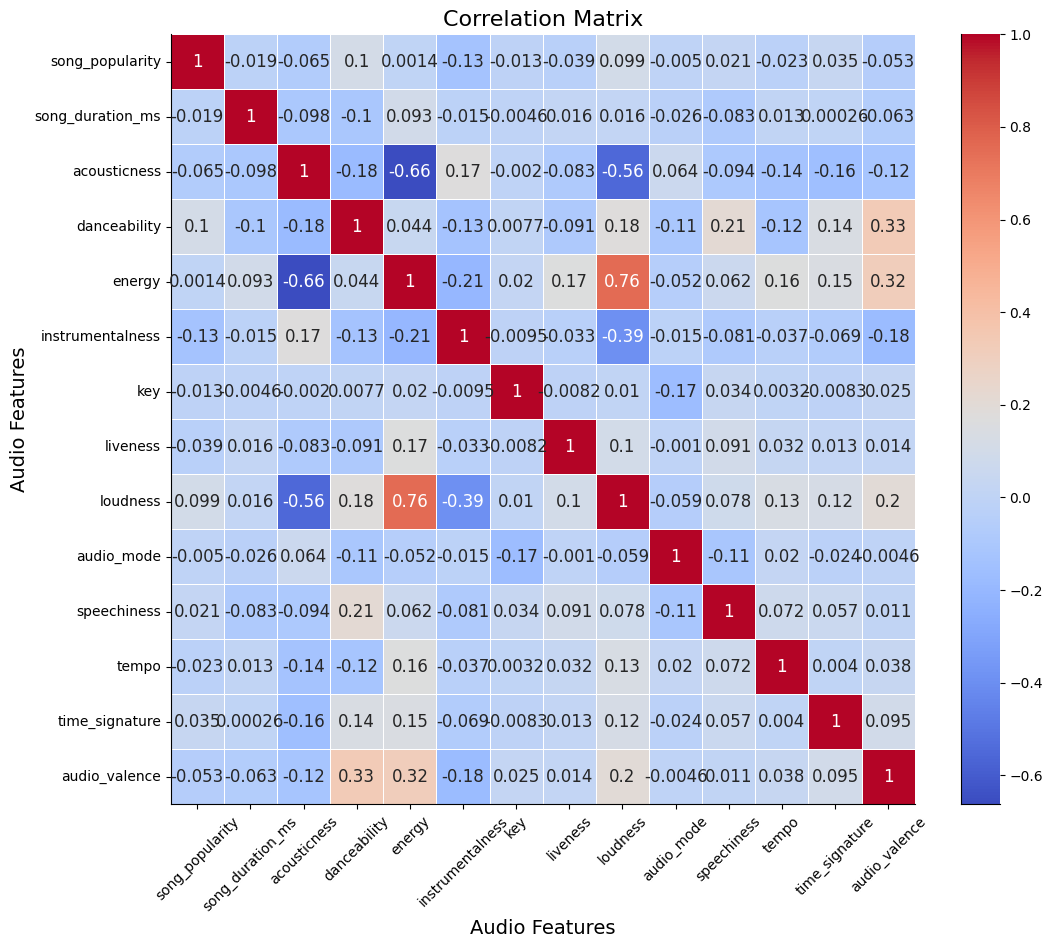

In [22]:
#Create correlation matrix using the dataframe
correlation_matrix = df.corr()

#Customize
plt.figure(figsize=(12, 10))
annot_kws = {"fontsize": 12, "ha": 'center', "va": 'center'}

#Create heatmap
ax = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, annot_kws=annot_kws)

plt.xticks(rotation=45)
ax.set_title('Correlation Matrix', fontsize=16)
ax.set_xlabel('Audio Features', fontsize=14)
ax.set_ylabel('Audio Features', fontsize=14)
ax.set_facecolor('#f7f7f7')
sns.despine()

plt.show()

This matrix shows the correlation between the audio features. We'll focus on the Song_popularity and the features that correlates to it. This will be used in "Feature Selection" phase later on.

### Checking for Outliers

In [23]:
from scipy.stats import zscore

#Calculate Z-scores for audio features
z_scores = zscore(df.drop(["key", "time_signature", "audio_mode", "song_popularity"], axis=1)) #drop categorical data

#Identify outliers based on Z-scores
outliers = (z_scores > 2) | (z_scores < -2)

#Number of outliers for each feature
outlier_counts = outliers.sum(axis=0)


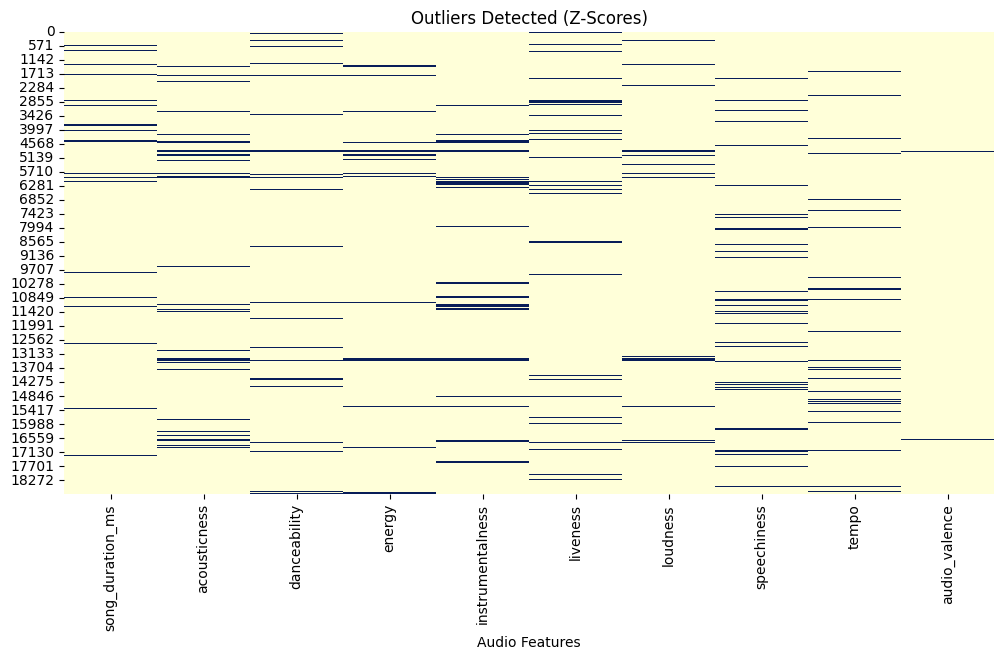

In [24]:
# Visualize outliers based on Z-scores
plt.figure(figsize=(12, 6))
sns.heatmap(outliers, cmap="YlGnBu", cbar=False)
plt.title('Outliers Detected (Z-Scores)')
plt.xlabel('Audio Features')
plt.show()


There are outliers present in this dataset but I decided to keep the outliers since popular songs might have unique audio features and would not impact negatively towards the prediction. An approach to remove the outliers works better with dataset of typical songs (e.g. songs in the same genre)

## Model Building

### Feature Selection

In [25]:
#Filter the correlation matrix to show only positive correlations with song_popularity
positive_correlations = correlation_matrix['song_popularity'][correlation_matrix['song_popularity'] > 0]

#Create a DataFrame to display the audio features and their positive correlations
positive_correlations_df = pd.DataFrame(positive_correlations)
positive_correlations_df.columns = ['Correlation with song_popularity']

#Sort the DataFrame in decreasing order of correlation values
positive_correlations_df = positive_correlations_df.sort_values(by='Correlation with song_popularity', ascending=False)

#Display the sorted DataFrame
print(positive_correlations_df)

print('\nThis is the list of audio features that are important and would give an impact towards the song popularity')

                 Correlation with song_popularity
song_popularity                          1.000000
danceability                             0.104290
loudness                                 0.099442
time_signature                           0.034983
speechiness                              0.021479
energy                                   0.001365

This is the list of audio features that are important and would give an impact towards the song popularity


### Training Model

In [26]:
#Choose selected features
selected_features = df[['danceability', 'loudness', 'time_signature', 'speechiness', 'energy']]

#Target variable
song_popularity = df['song_popularity']

#Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    selected_features,
    song_popularity,
    test_size=0.3,
    random_state=42
)


In [27]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

### Model Evaluation

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

#Evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 17.30438193197642
Mean Squared Error (MSE): 471.43683530930895
Root Mean Squared Error (RMSE): 21.712596236040245
R-squared (R2): 0.030455670716198258


In [29]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, selected_features, song_popularity, cv=5)

#Cross-validation results
print("Cross-Validation Scores:", scores)
print("Mean CV Score:", scores.mean())
print("Standard Deviation of CV Scores:", scores.std())


Cross-Validation Scores: [-0.03738114 -0.01985559  0.02638897  0.00917863  0.02980866]
Mean CV Score: 0.0016279056383107892
Standard Deviation of CV Scores: 0.026258426551059075


Initial Model Evaluation (Linear Regression):

- The negative values in cross-validation scores indicate that the model may not perform well on some subsets of the data.
- The small mean cross-validation score (0.0016) suggests that the model's performance is close to random guessing, with limited predictive power.
- The relatively high standard deviation (0.0263) indicates that the model's performance varies across different data subsets.
- The MAE, MSE, and RMSE values are relatively high, suggesting that the model's predictions deviate significantly from actual values. The low R2 value confirms that the model  is  not effectively explaining the variance in song popularity.

### Compare & Optimize model

In [30]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.7 MB/s eta 0:00:00


In [31]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

In [32]:
#Define your selected features
# selected_features = df[['danceability', 'loudness', 'time_signature', 'speechiness', 'energy']]
selected_features = df.drop('song_popularity', axis=1) #use all features since most of the models learn better even with negative correlation (deviate better)

song_popularity = df['song_popularity']

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    selected_features,
    song_popularity,
    test_size=0.1,
    random_state=42
)

#List of models (Removed the model which performed worse as it takes more time to run)
models = [
    # LinearRegression(),
    # Lasso(),
    # Ridge(),
    # DecisionTreeRegressor(),
    RandomForestRegressor(),
    # SVR(),
    # KNeighborsRegressor(),
    # GradientBoostingRegressor(),
    XGBRegressor(),
    LGBMRegressor(),
    CatBoostRegressor(),
    # MLPRegressor()
]

#Store evaluation metrics for each model
results = {
    "Model": [],
    "MAE": [],
    "MSE": [],
    "RMSE": [],
    "R2": []
}

#Loop through each model
for model in models:

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results["Model"].append(type(model).__name__)
    results["MAE"].append(mae)
    results["MSE"].append(mse)
    results["RMSE"].append(rmse)
    results["R2"].append(r2)

#Convert dictionary to DataFrame
results_df = pd.DataFrame(results)

print(results_df)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001003 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2569
[LightGBM] [Info] Number of data points in the train set: 16951, number of used features: 13
[LightGBM] [Info] Start training from score 52.979765
Learning rate set to 0.064031
0:	learn: 21.8316657	total: 53.1ms	remaining: 53.1s
1:	learn: 21.7565026	total: 58.3ms	remaining: 29.1s
2:	learn: 21.6806246	total: 63.8ms	remaining: 21.2s
3:	learn: 21.6096148	total: 69ms	remaining: 17.2s
4:	learn: 21.5409993	total: 74.2ms	remaining: 14.8s
5:	learn: 21.4854528	total: 79.7ms	remaining: 13.2s
6:	learn: 21.4209879	total: 85.1ms	remaining: 12.1s
7:	learn: 21.3697648	total: 90.4ms	remaining: 11.2s
8:	learn: 21.3200427	total: 95.8ms	remaining: 10.5s
9:	learn: 21.2787028	total: 101ms	remaining: 10s
10:	learn: 21.2416572	total: 106ms	remaining:

In [33]:
#Sort results by R2 in descending order
results_df = results_df.sort_values(by="R2", ascending=False)

#Best R2 value & highlight
best_index = results_df['R2'].idxmax()

def highlight_best_r2(val):
    if val == results_df['R2'].max():
        return 'background-color: blue'
    return ''

styled_results = results_df.style.applymap(highlight_best_r2, subset=pd.IndexSlice[[best_index], ["R2"]])
styled_results


,Model,MAE,MSE,RMSE,R2
0,RandomForestRegressor,11.596483,269.779697,16.424972,0.426040
1,XGBRegressor,13.867950,329.988306,18.165580,0.297945
3,CatBoostRegressor,14.345575,336.463266,18.342935,0.284170
2,LGBMRegressor,14.999845,365.138130,19.108588,0.223164


### Tuning Hyperparameters

Fine tuning hyperparameters below took close to 3 hours with minimal improvements, I'll use the untuned model above for faster solution
(Will use the fine tuned model in a company setting since % of improvement helps the business)

In [34]:
# #finetune test
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import GridSearchCV

# #Define the hyperparameters
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# model = RandomForestRegressor()

# #Create a GridSearchCV object with the model and hyperparameter grid
# grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_absolute_error')

# #Fit the GridSearchCV
# grid_search.fit(X_train, y_train)

# #Select best hyperparameters
# best_params = grid_search.best_params_

# #Create model with best hyperparameters
# best_model = RandomForestRegressor(**best_params)


# best_model.fit(X_train, y_train)
# y_pred = best_model.predict(X_test)

# mae = mean_absolute_error(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# r2 = r2_score(y_test, y_pred)

# print("Best Hyperparameters:", best_params)
# print("Tuned RandomForestRegressor MAE:", mae)
# print("Tuned RandomForestRegressor MSE:", mse)
# print("Tuned RandomForestRegressor RMSE:", rmse)
# print("Tuned RandomForestRegressor R2:", r2)


In [35]:
#Train best model
best_model = RandomForestRegressor()
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

In [36]:
#Save best_model to a pickle file
with open('best_modell.pkl', 'wb') as file:
    pickle.dump(best_model, file)

In [37]:
#Load the test dataset (Scraped data)
test_df = pd.read_csv('spottest.csv')

#Store the "song_name" column
song_names = test_df['song_name']

#Store the "song_popularity" column as actual popularity
actual_popularity = test_df['song_popularity']


In [38]:
test_df.tail()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
95,teenage dream,84,222358,0.8160,0.422,0.229,0.000000,0,0.1090,-10.208,1,0.0362,135.820,4,0.104
96,Angels (Don’t Always Have Wings),71,200427,0.0630,0.527,0.598,0.000153,1,0.0913,-4.257,1,0.0283,66.041,3,0.230
97,WHERE SHE GOES,93,231704,0.1430,0.652,0.800,0.629000,9,0.1120,-4.019,0,0.0614,143.978,4,0.234
98,Lil Boo Thang,83,114234,0.1520,0.850,0.699,0.000000,0,0.3200,-3.292,1,0.0776,114.481,4,0.915
99,Put It On Da Floor Again (feat. Cardi B),76,185748,0.0282,0.849,0.614,0.000000,1,0.0603,-7.323,1,0.3170,111.363,5,0.472


In [39]:
#Load the best model
with open('best_modell.pkl', 'rb') as file:
    trained_model = pickle.load(file)

In [50]:
#Remove the "song_name" and "song_popularity" columns
test_df = test_df.drop(columns=['song_name', 'song_popularity'])

#Predict with best model
predictions = trained_model.predict(test_df)



# Create a DataFrame to store the "song_name," predicted popularity, and actual popularity
result_df = pd.DataFrame({'song_name': song_names, 'predicted_popularity': predictions, 'actual_popularity': actual_popularity})

# Calculate the difference between predicted and actual popularity
result_df['popularity_difference'] = result_df['predicted_popularity'] - result_df['actual_popularity']

# Now, result_df contains "song_name," predicted popularity, actual popularity, and the difference
print(result_df)


                           song_name  predicted_popularity  actual_popularity  \
0                                NaN             46.080000                 90   
1                                NaN             52.120000                100   
2                                NaN             57.770000                 92   
3                                NaN             69.050000                 90   
4                                NaN             49.970000                 93   
..                               ...                   ...                ...   
95                               NaN             58.651429                 84   
96  Angels (Don’t Always Have Wings)             55.575000                 71   
97                               NaN             39.575000                 93   
98                               NaN             59.159714                 83   
99                               NaN             53.290000                 76   

    popularity_difference  

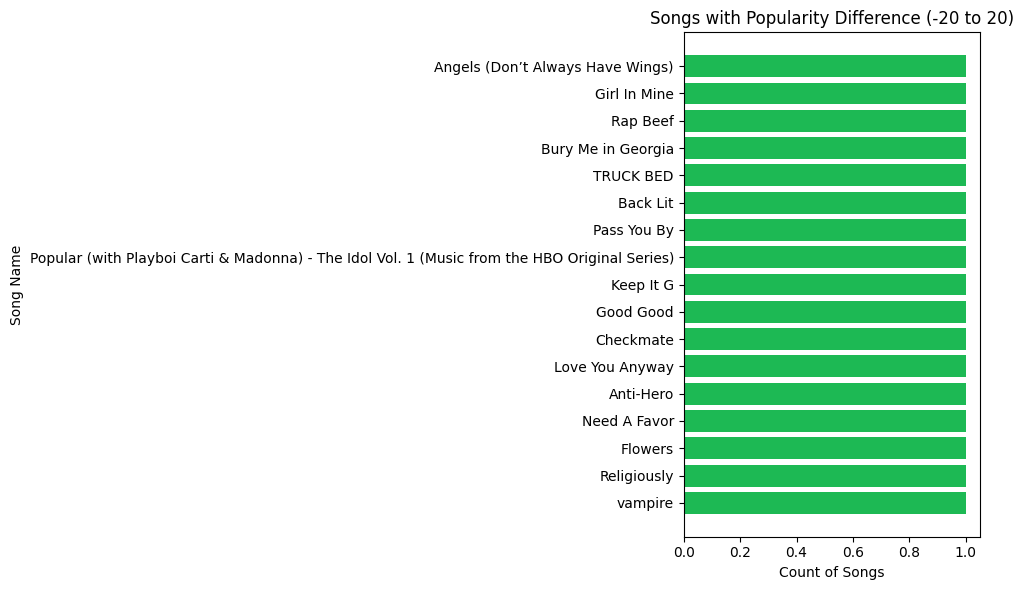

In [51]:
#Filter rows where the prediction difference is between -20 and 20
filtered_result_df = result_df[(result_df['popularity_difference'] >= -20) & (result_df['popularity_difference'] <= 20)]

#Count the number of songs
count = len(filtered_result_df)

song_names = filtered_result_df['song_name']

plt.figure(figsize=(10, 6))
plt.barh(song_names, [1] * count)  # Assign a constant value of 1 to each song for counting
plt.xlabel('Count of Songs')
plt.ylabel('Song Name')
plt.title('Songs with Popularity Difference (-20 to 20)')
plt.tight_layout()

plt.show()


Model is able to predict popularity score with slight deviation

In [47]:
display(filtered_result_df[['song_name', 'actual_popularity', 'predicted_popularity']])

,song_name,actual_popularity,predicted_popularity
6,vampire,85,66.130000
13,Religiously,32,48.650000
14,Flowers,69,60.209556
21,Need A Favor,35,48.090000
25,Anti-Hero,72,62.626667
40,Love You Anyway,70,53.650000
54,Checkmate,71,54.090000
56,Good Good,75,67.033333
70,Keep It G,71,51.424000
71,Popular (with Playboi Carti & Madonna) - The I...,53,54.700000


It can be seen that although the R2-Score with only 0.43, the model is able to predict closely to the actual value.

If we take **Popular (with Playboi Carti & Madonna)** which only had **1.7 deviation** from the actual value. We can conclude that the **song_data** which had the mean between **50-60 popularity score** based on the distribution graph I have made in EDA helped:

1. Identifying accurately for ranges between 50-60 popularity due to the amount of data the model can learn from

2. Lack of data from other popularity scores increases the differences in prediction (As seen in distribution graph)

3. More data needed (The higher the popularity the better)

## Conclusion

1. This model as of now has the highest R2-score of 0.43 compared to other research

2. Predicted 20% of the test data with slight deviation from actual value

3. More variance of data needed in determining popularity scores for this model

4. Improvements can be made through fine tuning & more data

Thanks for reading!